# Note

1.　関数

2.　科学計算ライブラリScipy

# 関数

関数は以下のようにして定義する

## 関数の例

$\sin^2(x)$ を返す関数を定義する。

In [1]:
import numpy as np

def sin_square(x):
    sin = np.sin(x)
    sin2 = sin*sin
    return sin2

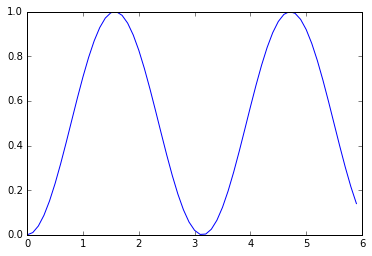

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(0, 6, 0.1)

# for ループを一行で書く方法
y = [sin_square(x1) for x1 in x]

plt.plot(x, y)

## 宿題1 - Lorentz 関数を返す関数 - 

以下のLorentz関数 
$$
L(x| A, x_0, \gamma) = A\frac{\gamma}{1 + \left(\frac{x-x_0}{\gamma}\right)^2}
$$
を作って描画する

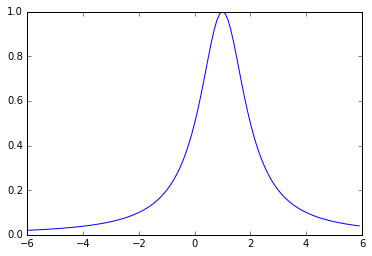

In [3]:
def Lorentz_res(x):
    A = 1
    x0 = 1
    gamma = 1
    y0 = 1
    
    return  A * gamma / (1.0 + ((x-x0)/gamma)**2.0)
x = np.arange(-6, 6, 0.1)
y = Lorentz_res(x)

plt.plot(x, y)

# Scipy

科学計算で使う機能を提供するライブラリ。

ここでは、最小二乗近似(scipy.optimize.leastsq)、最小化（scipy.optimize.minimize）を使ってみる。

仕様（

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.leastsq.html

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.minimize.html

）を参照すること。


In [4]:
# ライブラリのインポート
import scipy.optimize

## テストデータの読み込み・描画

ファイル
tutorial3_files/x_lorentz.txt
tutorial3_files/y_lorentz.txt
を読み込む。
それぞれ、コンマで区切られたテキストファイルである。

In [5]:
# データの読み込み
x_lorentz = np.loadtxt("tutorial3_files/x_lorentz.txt")
y_lorentz = np.loadtxt("tutorial3_files/y_lorentz.txt")

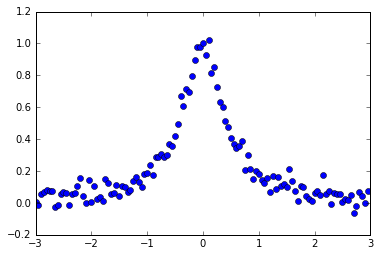

In [6]:
# 描画
plt.plot(x_lorentz, y_lorentz, 'o')

## scipy.optimize.leastsq を用いたフィッティング

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.leastsq.html

http://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/15fit_data3.html

などを参考にする。

まず、各xにおいて、近似値（Lorentz関数）と計測データ（上記の青丸データ）の差をnp.arrayで返す関数を定義する。

In [26]:
# parameters : 求めたいパラメータ。今回の場合はLorentz関数の形を定義する A， x０，γ とオフセットy0
def Lorentz_res(parameters, x, y):
    A = parameters[0]
    x0 = parameters[1]
    gamma = parameters[2]
    y0 = parameters[3]
    
    return y - (np.ones(len(x)) * y0 + A * gamma / (1.0 + ((x-np.ones(len(x))*x0)/gamma)**2.0))

パラメータの初期値を指定する

In [27]:
param_init = [1.0, 0.1, 0.4, 0.1]

フィッティングを実行する

In [28]:
result = scipy.optimize.leastsq(Lorentz_res,param_init,args=(x_lorentz,y_lorentz))

In [29]:
result

(array([ 2.18669214, -0.00855874,  0.44299388,  0.01660112]), 1)

In [32]:
A = result[0][0]
x0 = result[0][1]
gamma = result[0][2]
y0 = result[0][3]

y_fit = (y0 + A * gamma / (1.0 + ((x_lorentz-x0)/gamma)**2.0))

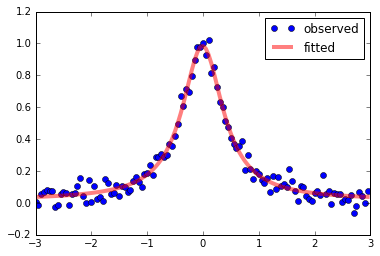

In [33]:
# 描画
plt.plot(x_lorentz, y_lorentz, 'o', label="observed")
plt.plot(x_lorentz, y_fit, 'r', alpha=0.5, linewidth=4.0, label="fitted")
plt.legend()

## 宿題2

データ

tutorial3_files/x_gauss.txt

tutorial3_files/y_gauss.txt

をガウス関数
$$
{\mathcal G}(x | A, x_0, \sigma, y_0) = y_0 + \frac{A}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x-x_0)^2}{2w^2}\right)
$$
でフィッティングする。

今回は、

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.minimize.html

http://oppython.hatenablog.com/entry/2015/09/28/222920

などを参考にして
scipy.optimize.minimize
を使ってデータを最も再現する$A, x_0, \sigma, y_0$ を求める。


フィッティング曲線と、データ点を描画するとともに、グラフ内に
求めた
$A, x_0, \sigma, y_0$
を記載する。

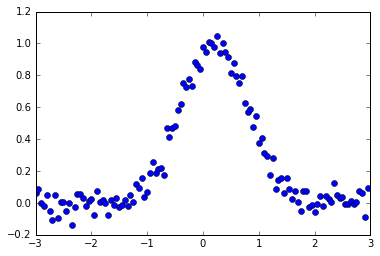

In [14]:
x_gauss = np.loadtxt("tutorial3_files/x_gauss.txt")
y_gauss = np.loadtxt("tutorial3_files/y_gauss.txt")
plt.plot(x_gauss, y_gauss, 'o')

In [34]:
def gauss(x, A, x0, sigma, y0):
    return y0 + A * np.exp(-(x-x0)**2/2/sigma**2)/np.sqrt(2*np.pi*sigma**2)

In [35]:
def gauss_res(parameters, x, y):
    A = parameters[0]
    x0 = parameters[1]
    sigma = parameters[2]
    y0 = parameters[3]    
    return np.sum(np.square(y -gauss(x, A, x0, sigma, y0)))

In [36]:
param_init = [1.0, 0.1, 0.4, 0.1,0.1]

In [37]:
gauss_res(param_init, x_gauss, y_gauss)

1.9202835055048979

In [38]:
result = scipy.optimize.minimize(gauss_res,param_init,args=(x_gauss,y_gauss))
result

      fun: 0.32082664256511895
 hess_inv: array([[  1.54225572e-01,   3.55703983e-04,   4.01148196e-02,
         -2.59155448e-02,   0.00000000e+00],
       [  3.55703983e-04,   1.65085929e-02,   2.29696339e-04,
          9.07708431e-05,   0.00000000e+00],
       [  4.01148196e-02,   2.29696339e-04,   2.11639765e-02,
         -6.75867172e-03,   0.00000000e+00],
       [ -2.59155448e-02,   9.07708431e-05,  -6.75867172e-03,
          8.51471202e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]])
      jac: array([  5.36441803e-07,  -1.52736902e-07,  -2.23517418e-07,
         4.91738319e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 98
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([  1.49461571e+00,   2.00574061e-01,   5.93345626e-01,
         7.29379155e-04,   1.00000000e-01])

In [41]:
result['x']

array([  1.49461571e+00,   2.00574061e-01,   5.93345626e-01,
         7.29379155e-04,   1.00000000e-01])

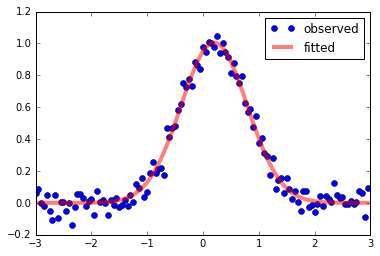

In [42]:
y_fit = gauss(x_gauss, result['x'][0], result['x'][1], result['x'][2], result['x'][3])
plt.plot(x_gauss, y_gauss, 'o', label="observed")
plt.plot(x_gauss, y_fit, 'r', alpha=0.5, linewidth=4.0, label="fitted")
plt.legend()

ValueError: setting an array element with a sequence.

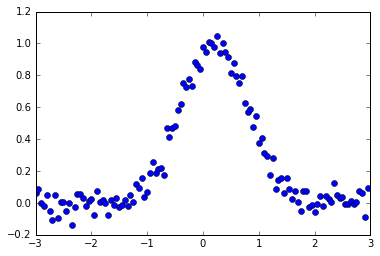

In [13]:
from scipy.optimize import minimize,leastsq
x_gauss = np.loadtxt("tutorial3_files/x_gauss.txt")
y_gauss = np.loadtxt("tutorial3_files/y_gauss.txt")
plt.plot(x_gauss, y_gauss, 'o')
def gauss_res(parameters, x, y):
    A = parameters[0]
    x0 = parameters[1]
    sigma = parameters[2]
    y0 = parameters[3]    
    return (y_gauss -(np.ones(len(x_gauss)) * y0 + A * np.exp(-(x_gauss-np.ones(len(x_gauss))*x0)**2/2/sigma**2)/np.sqrt(2*np.pi*sigma**2)))**2
param_init = [1.0, 0, 0.4, 1.0]
result = minimize(gauss_res,param_init,args=(x_gauss,y_gauss),method="nelder-mead")
result
A = result[0][0]
x0 = result[0][1]
sigma = result[0][2]
y0 = result[0][3]
y_fit = np.ones(len(x_gauss)) * y0 + A * np.exp(-(x_gauss-np.ones(len(x_gauss))*x0)**2/2/sigma**2)/np.sqrt(2*np.pi*sigma**2)
plt.plot(x_gauss, y_gauss, 'o', label="observed")
plt.plot(x_gauss, y_fit, 'r', alpha=0.5, linewidth=4.0, label="fitted")
plt.legend()